## **🌟 Feature Selection Setup**

In this step, we prepare to perform **feature selection** on the cleaned & scaled dataset (from notebook-1):  

- **Libraries**:  
  - `RandomForestClassifier` → to get feature importance scores.  
  - `RFE` (Recursive Feature Elimination) → to iteratively select the best predictors.  
  - `SelectKBest` + `chi2` → to rank features based on Chi-Square Test.  
  - `LogisticRegression` → as an estimator for RFE.  
  - `matplotlib`, `seaborn` → for visualization.  

 Now we’re ready to apply different feature selection techniques and analyze which variables are most important for predicting heart disease.  


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X = pd.read_csv("../data/processed/processed_X.csv")
y = pd.read_csv("../data/processed/processed_y.csv")
y = y.values.ravel()

## **🌲 Feature Importance using Random Forest**

We fit a **Random Forest Classifier** on the processed dataset to measure how important each feature is:  

- `rf.fit(X, y)` → trains the Random Forest model.  
- `feature_importances_` → gives a score for each feature based on how much it contributes to reducing impurity in the trees.  
- Results are stored in a DataFrame and sorted in descending order.  

This helps us quickly identify which features are the most influential in predicting heart disease.  


In [2]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

## **📊 Visualization of Feature Importance (Random Forest)**

The bar plot shows the **relative importance of each feature** according to the Random Forest model:  

- Features at the top contribute the most to the prediction.  
- Longer bars = higher importance.  
- This gives us an initial ranking of which variables are most relevant for detecting heart disease.  

Finally, the plot shows that features like **thal_7.0**, **cp_4**, **age**, and **chol** have moderate impact, while **restecg_1** and **slope_3** contribute very little.  

**Conclusion:** The model mainly relies on key medical features (**ca**, **thalach**, **oldpeak**) with others playing a minor role.  

➡️ Next, we can compare this with other feature selection methods (RFE, Chi-Square) to confirm consistency.  


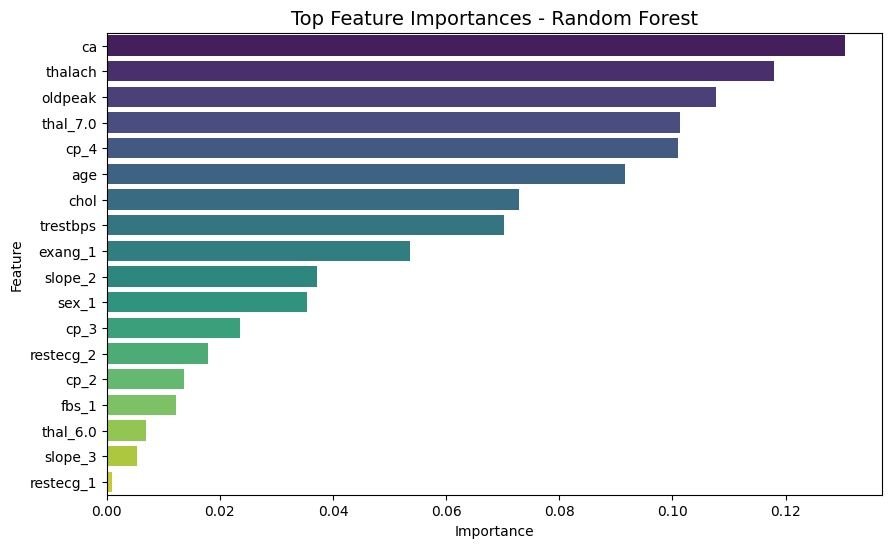

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, hue="Feature", palette="viridis", legend=False)
plt.title("Top Feature Importances - Random Forest", fontsize=14)
plt.show()

## **✅ Analysis of RFE Results**

- RFE selected the **top 10 most predictive features** for heart disease.  
- These features were ranked based on how much they contributed to the Logistic Regression model.  
- The features marked as `Selected = True` are the ones that remain after eliminating the less important ones.  

➡️ Compared to Random Forest feature importance, RFE may highlight a slightly different set of features.  
This gives us another perspective on which variables are most useful and helps cross-check the consistency of our feature selection process.  


In [4]:
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=10)  # choose top 10
rfe.fit(X, y)

rfe_results = pd.DataFrame({
    "Feature": X.columns,
    "Selected": rfe.support_,
    "Ranking": rfe.ranking_
}).sort_values(by="Ranking")

print("✅ Top features selected by RFE:")
print(rfe_results[rfe_results["Selected"] == True])

✅ Top features selected by RFE:
      Feature  Selected  Ranking
3     thalach      True        1
6       sex_1      True        1
5          ca      True        1
4     oldpeak      True        1
7        cp_2      True        1
13    exang_1      True        1
14    slope_2      True        1
9        cp_4      True        1
12  restecg_2      True        1
17   thal_7.0      True        1


## **📐 Chi-Square Feature Selection**

We applied the **Chi-Square Test** (after MinMax scaling) to select the top 10 features most associated with heart disease:  

- **How it works**:  
  - Chi-Square measures the dependency between each feature and the target.  
  - We used `SelectKBest` with `chi2` to pick the 10 best features.  

- **Results**:  
  - The strongest predictors are **`thal_7.0`**, **`cp_4`**, and **`exang_1`** with the highest Chi-Square scores.  
  - Other important features include **`ca`**, **`cp_3`**, and **`slope_2`**.  
  - Continuous variables like **`oldpeak`** also contribute, but with lower scores.  
  - Features such as **`sex_1`** and **`restecg_2`** are selected but less impactful.  

Overall, Chi-Square emphasizes **categorical factors (chest pain type, thalassemia, exercise-induced angina)** as highly significant predictors of heart disease.  


In [5]:
# Special scaling for Chi-Square
from sklearn.preprocessing import MinMaxScaler

X_chi = MinMaxScaler().fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_chi, y)

chi2_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi2_selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)

print("✅ Top features selected by Chi-Square Test:")
print(chi2_results.head(10))


✅ Top features selected by Chi-Square Test:
      Feature  Chi2 Score
17   thal_7.0   42.958360
9        cp_4   42.410097
13    exang_1   38.052613
5          ca   28.038394
8        cp_3   21.551109
14    slope_2   20.624160
7        cp_2   15.646367
4     oldpeak   11.382669
6       sex_1    7.432845
12  restecg_2    3.987845


## **💾 Saving Feature Selection Results**

Finally, we save the outputs of the three feature selection methods for future use:  

- `rfe_selected_features.csv` → top features selected using **RFE (Recursive Feature Elimination)**.  
- `feature_importance_rf.csv` → feature importance scores from **Random Forest**.  
- `chi2_selected_features.csv` → Chi-Square scores and ranking of features.  

This ensures that the results of our feature selection experiments are stored and can be reused in the **modeling stage** without recomputing them.  


In [6]:
rfe_results.to_csv("../data/processed/rfe_selected_features.csv", index=False)
feature_importance.to_csv("../data/processed/feature_importance_rf.csv", index=False)
chi2_results.to_csv("../data/processed/chi2_selected_features.csv", index=False)